# OF-driven Gaussian denoising

In [1]:
!which python

/home/vruiz/enviroments/SM/bin/python


In [2]:
!pip install --upgrade pip

In [3]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from ipywidgets import *
import cv2
import time
import kernels
import _2D_OF_denoising2 as _2D_OF_denoising

In [4]:
try:
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image
except:
    !pip install "image_IO @ git+https://github.com/vicente-gonzalez-ruiz/image_IO"
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image

In [5]:
sigma = 2.0

[6.69162896e-05 4.36349021e-04 2.21596317e-03 8.76430436e-03
 2.69959580e-02 6.47599366e-02 1.20987490e-01 1.76035759e-01
 1.99474648e-01 1.76035759e-01 1.20987490e-01 6.47599366e-02
 2.69959580e-02 8.76430436e-03 2.21596317e-03 4.36349021e-04
 6.69162896e-05]
1.0


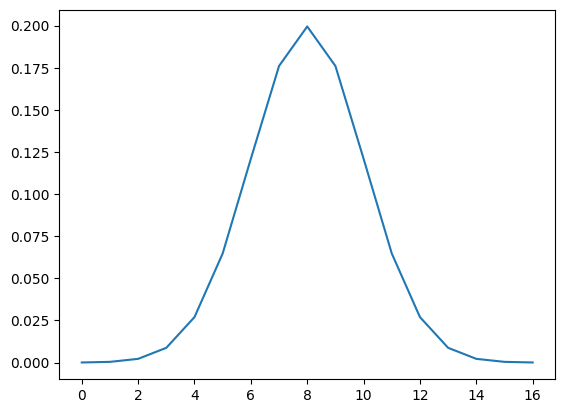

In [6]:
kernel = kernels.get_gaussian_kernel(sigma) #compute_gaussian_kernel(sigma)
print(kernel)
print(np.sum(kernel))
plt.plot(kernel)
plt.show()

In [7]:
!wget http://www.hpca.ual.es/~vruiz/images/barb.png

--2023-01-23 22:54:52--  http://www.hpca.ual.es/~vruiz/images/barb.png
Resolviendo www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Conectando con www.hpca.ual.es (www.hpca.ual.es)[150.214.150.42]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 232140 (227K) [image/png]
Grabando a: «barb.png.50»

barb.png.50         100%[===================>] 226,70K  --.-KB/s    en 0,1s    

2023-01-23 22:54:52 (1,52 MB/s) - «barb.png.50» guardado [232140/232140]



In [8]:
img = gray_image.read("barb.png")

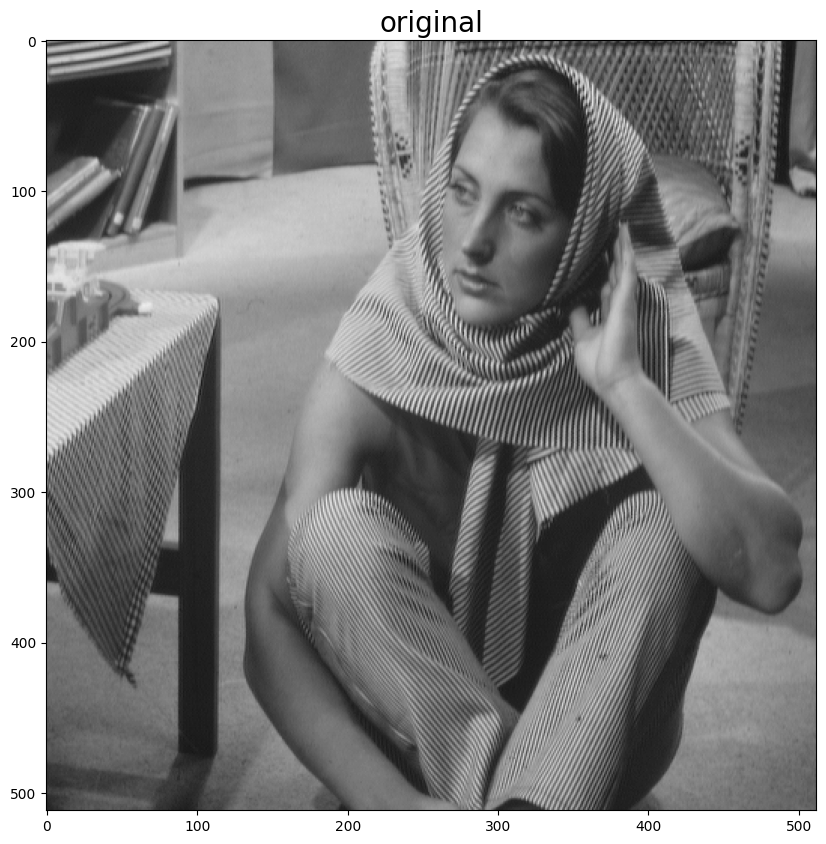

In [9]:
gray_image.show(img, "original")

In [10]:
mean = 0
var = 200
sigma = var**0.5
noise = np.random.normal(mean,sigma,img.shape).reshape(img.shape)
noisy_img = np.clip((img + noise), 0, 255).astype(np.uint8)

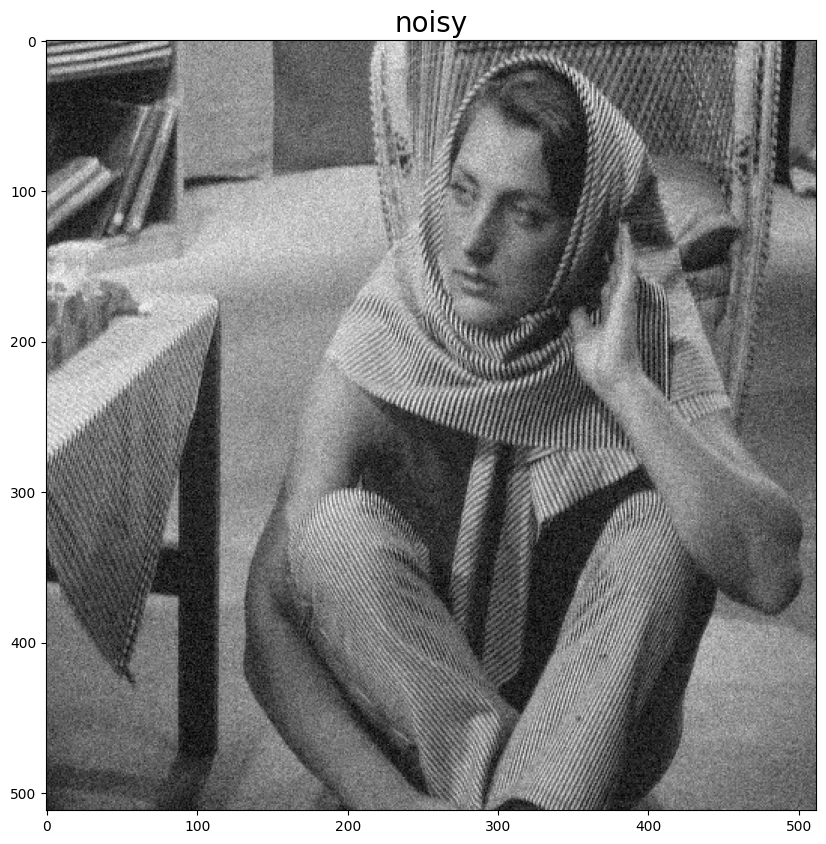

In [11]:
gray_image.show(noisy_img, "noisy")

In [12]:
denoised_img = _2D_OF_denoising.filter(noisy_img, kernel, l=1, w=33)

img.shape=(512, 512) kernel.shape=(17,) l=1 w=33
< 1.6437713 >
< 1.6437713 >
< 1.6437713 >
< 1.6437713 >
< 1.6437713 >
< 1.6437713 >
< 1.6437713 >
< 1.6437713 >
< 1.2440645 >
< 2.2323704 >
< 3.335018 >
< 4.2119107 >
< 5.1681843 >
< 5.467442 >
< 4.1659994 >
< 2.843859 >
0 < 1.3219665 >
< 1.3219665 >
< 1.3219665 >
< 1.3219665 >
< 1.3219665 >
< 1.3219665 >
< 1.3219665 >
< 0.24699923 >
< 1.2260858 >
< 2.4268467 >
< 3.4119785 >
< 4.405328 >
< 5.098892 >
< 4.927739 >
< 3.196882 >
< 2.8259208 >
1 < 1.1776426 >
< 1.1776426 >
< 1.1776426 >
< 1.1776426 >
< 1.1776426 >
< 1.1776426 >
< 0.3272183 >
< 0.23368494 >
< 1.1369568 >
< 2.3428118 >
< 3.4164405 >
< 4.4962626 >
< 6.1941013 >
< 4.789479 >
< 2.7744062 >
< 2.849984 >
2 < 1.2229729 >
< 1.2229729 >
< 1.2229729 >
< 1.2229729 >
< 1.2229729 >
< 0.29473323 >
< 0.3607731 >
< 0.23848288 >
< 1.0841712 >
< 2.207691 >
< 3.28183 >
< 4.2709923 >
< 8.716062 >
< 7.2736444 >
< 3.6832886 >
< 2.0858073 >
3 < 1.3661302 >
< 1.3661302 >
< 1.3661302 >
< 1.3661302 >


< 0.22616862 >
< 1.054632 >
< 2.137592 >
< 3.1335342 >
< 4.1591463 >
< 5.254134 >
< 4.0954733 >
< 4.175458 >
< 3.990632 >
36 < 3.7573364 >
< 3.9744358 >
< 2.9094028 >
< 2.8610883 >
< 2.0961843 >
< 0.15965807 >
< 0.22883801 >
< 0.22507133 >
< 1.039477 >
< 2.0623019 >
< 3.0871851 >
< 4.1788206 >
< 5.139078 >
< 3.9740949 >
< 3.9566987 >
< 3.9942486 >
37 < 3.7321515 >
< 4.462299 >
< 2.548781 >
< 2.9877036 >
< 2.1813989 >
< 0.11905873 >
< 0.17462695 >
< 0.21140453 >
< 1.0344502 >
< 2.1370494 >
< 3.1670885 >
< 4.206952 >
< 4.9839373 >
< 3.7256532 >
< 3.8376262 >
< 3.8768177 >
38 < 3.6460197 >
< 4.234859 >
< 3.1450334 >
< 2.901177 >
< 3.1720777 >
< 0.1392991 >
< 0.116105944 >
< 0.08139532 >
< 1.0335869 >
< 2.076188 >
< 3.1125987 >
< 4.495651 >
< 4.6711187 >
< 3.6154046 >
< 3.755715 >
< 3.6478577 >
39 < 3.3346486 >
< 3.7783697 >
< 2.503671 >
< 2.6359687 >
< 3.0991542 >
< 0.13312815 >
< 0.10070173 >
< 0.07085566 >
< 1.0417143 >
< 2.1363544 >
< 3.1517866 >
< 4.290423 >
< 4.153893 >
< 3.2764766 >

< 5.04519 >
< 5.6966796 >
< 5.9425306 >
< 6.1943502 >
72 < 2.686328 >
< 2.2745724 >
< 2.2423708 >
< 2.4930282 >
< 2.361122 >
< 0.092149824 >
< 0.07800495 >
< 0.054762274 >
< 1.0352497 >
< 2.0662024 >
< 3.0847633 >
< 4.8726077 >
< 4.9018946 >
< 5.783094 >
< 6.04692 >
< 6.0251694 >
73 < 2.72247 >
< 2.3517401 >
< 2.1587274 >
< 2.457074 >
< 2.429918 >
< 0.10258992 >
< 0.058102258 >
< 0.041625947 >
< 1.0232353 >
< 2.0587435 >
< 3.1394298 >
< 4.2389154 >
< 4.963724 >
< 5.7751946 >
< 5.895673 >
< 6.190346 >
74 < 2.6935954 >
< 2.5596747 >
< 1.9027811 >
< 2.7661703 >
< 2.5448549 >
< 0.0795184 >
< 0.05159265 >
< 0.046136774 >
< 1.0286901 >
< 2.1191692 >
< 3.1852388 >
< 4.293204 >
< 4.973698 >
< 5.5714474 >
< 5.8105216 >
< 5.94197 >
75 < 2.6285424 >
< 2.659342 >
< 2.0499964 >
< 3.0912108 >
< 2.5839396 >
< 0.06534684 >
< 0.045763772 >
< 0.03363037 >
< 1.056554 >
< 2.25264 >
< 3.3677304 >
< 4.600019 >
< 5.2065983 >
< 5.813923 >
< 6.1099844 >
< 5.8359537 >
76 < 2.5273838 >
< 2.739028 >
< 2.1582217 >

< 2.1699946 >
< 2.901597 >
< 0.451324 >
< 0.31996882 >
< 0.21813609 >
< 1.047409 >
< 2.074056 >
< 3.1188762 >
< 4.2482424 >
< 5.174743 >
< 5.798228 >
< 5.8302045 >
< 5.97249 >
109 < 3.679118 >
< 4.1162086 >
< 3.5846853 >
< 2.6793988 >
< 2.8226216 >
< 0.42114916 >
< 0.31410012 >
< 0.20547506 >
< 1.0441622 >
< 2.090117 >
< 3.1553056 >
< 4.2471247 >
< 5.159034 >
< 6.1777463 >
< 5.7667627 >
< 6.05272 >
110 < 3.7590377 >
< 4.3365417 >
< 3.5663114 >
< 2.39763 >
< 2.617073 >
< 0.41196957 >
< 0.28600618 >
< 0.18973906 >
< 1.0395807 >
< 2.0807848 >
< 3.206698 >
< 4.2061462 >
< 5.2387385 >
< 6.304949 >
< 5.9396715 >
< 6.09573 >
111 < 3.623351 >
< 4.4954157 >
< 3.3647647 >
< 2.1238453 >
< 2.5821967 >
< 0.3882199 >
< 0.2748667 >
< 0.16456944 >
< 1.0238398 >
< 2.0497205 >
< 3.212942 >
< 4.158605 >
< 5.340364 >
< 5.8178453 >
< 6.1991982 >
< 6.518568 >
112 < 3.3962471 >
< 4.4928107 >
< 3.1371722 >
< 2.119226 >
< 2.674943 >
< 0.39336672 >
< 0.27195743 >
< 0.1720679 >
< 1.0250801 >
< 2.0672474 >
< 3.21

< 6.1897984 >
< 5.898095 >
< 5.574993 >
145 < 6.3942747 >
< 5.992165 >
< 3.1400642 >
< 1.7964473 >
< 1.7936656 >
< 2.7175403 >
< 0.13777933 >
< 0.10618946 >
< 1.0395278 >
< 2.056129 >
< 3.7053695 >
< 4.285753 >
< 5.446603 >
< 6.048391 >
< 5.8231115 >
< 5.8176947 >
146 < 4.948613 >
< 4.5985527 >
< 2.4319162 >
< 1.8255855 >
< 1.8091091 >
< 2.655051 >
< 0.14987141 >
< 0.117560014 >
< 1.0336628 >
< 2.1087067 >
< 3.1452193 >
< 4.4272075 >
< 5.0196056 >
< 5.899192 >
< 6.689352 >
< 5.9977646 >
147 < 4.576438 >
< 3.095971 >
< 2.267162 >
< 1.8646684 >
< 1.8225143 >
< 1.5839777 >
< 0.19748025 >
< 0.14905982 >
< 1.0552545 >
< 2.1281116 >
< 3.3957927 >
< 4.3631463 >
< 5.1354055 >
< 5.865365 >
< 6.8216314 >
< 6.972363 >
148 < 3.413816 >
< 3.1023626 >
< 2.137421 >
< 1.9075212 >
< 1.8268244 >
< 0.23089923 >
< 0.23143429 >
< 0.2023332 >
< 1.1003865 >
< 2.2714503 >
< 3.3303742 >
< 4.2239766 >
< 5.2744813 >
< 5.960219 >
< 6.8466763 >
< 6.7663364 >
149 < 3.3115714 >
< 3.044833 >
< 2.012525 >
< 1.9410359 

181 < 3.442774 >
< 4.3528843 >
< 4.4007716 >
< 1.3895425 >
< 0.43557987 >
< 0.10040665 >
< 0.056706116 >
< 0.042790387 >
< 1.0634804 >
< 2.1860268 >
< 3.2626576 >
< 4.3766932 >
< 5.3021746 >
< 6.183715 >
< 5.8982964 >
< 5.2001657 >
182 < 3.545326 >
< 4.42866 >
< 1.7898827 >
< 1.4151441 >
< 0.38743868 >
< 0.09101632 >
< 0.07199036 >
< 0.05544062 >
< 1.0666897 >
< 2.110201 >
< 3.1459584 >
< 4.410531 >
< 5.302922 >
< 6.0297966 >
< 5.56098 >
< 4.849853 >
183 < 3.682843 >
< 3.849479 >
< 1.6258 >
< 1.2682468 >
< 0.41589952 >
< 0.10563828 >
< 0.113047406 >
< 0.094102345 >
< 1.0338484 >
< 2.090239 >
< 3.139783 >
< 4.4274836 >
< 5.292896 >
< 6.024127 >
< 4.815809 >
< 4.7527103 >
184 < 3.7302089 >
< 2.2289395 >
< 1.9773991 >
< 1.1542073 >
< 0.197895 >
< 0.15985106 >
< 0.10202954 >
< 0.051104527 >
< 1.026884 >
< 2.0708854 >
< 3.1303344 >
< 4.285133 >
< 5.185738 >
< 6.0763927 >
< 4.675655 >
< 4.695705 >
185 < 2.1895845 >
< 2.0263658 >
< 2.0277736 >
< 1.2797705 >
< 0.25088504 >
< 0.13104771 >
< 0.1

< 3.9899821 >
< 3.7658293 >
< 1.4675722 >
< 0.08829969 >
< 0.04667624 >
< 0.13035533 >
< 1.0241354 >
< 2.0688672 >
< 3.107689 >
< 4.1312995 >
< 5.270836 >
< 6.1429644 >
< 6.569325 >
< 5.4324493 >
218 < 4.6804166 >
< 4.0785103 >
< 4.0499816 >
< 3.7711155 >
< 1.5809233 >
< 0.0929491 >
< 0.11244818 >
< 0.14108163 >
< 1.0441407 >
< 2.1100516 >
< 3.146413 >
< 4.261283 >
< 5.2479963 >
< 6.1042953 >
< 6.6815777 >
< 4.927463 >
219 < 5.0982614 >
< 3.6225686 >
< 4.2620125 >
< 3.844635 >
< 1.5999928 >
< 0.08100818 >
< 0.091778874 >
< 0.11688499 >
< 1.0556705 >
< 2.0900302 >
< 3.1473439 >
< 4.4164615 >
< 5.218203 >
< 6.1386776 >
< 6.7554574 >
< 4.1788983 >
220 < 5.33609 >
< 3.222075 >
< 4.1872835 >
< 3.888442 >
< 1.7730759 >
< 0.13535717 >
< 0.061361097 >
< 0.12538406 >
< 1.039778 >
< 2.0719712 >
< 3.1620603 >
< 4.1419272 >
< 5.1546545 >
< 6.086164 >
< 6.6418023 >
< 4.2432404 >
221 < 5.6072164 >
< 3.1915555 >
< 3.9091623 >
< 3.8837416 >
< 1.8253728 >
< 0.250388 >
< 0.06891955 >
< 0.11200791 >
< 1.

< 2.1409445 >
< 0.4199181 >
< 0.12761897 >
< 0.06037298 >
< 1.0472932 >
< 2.0744286 >
< 3.0884323 >
< 4.245815 >
< 5.175704 >
< 6.068538 >
< 4.788971 >
< 4.6433916 >
254 < 2.8749623 >
< 2.8192236 >
< 2.8765996 >
< 2.8979237 >
< 2.0421016 >
< 0.37226313 >
< 0.080535226 >
< 0.04157549 >
< 1.0480177 >
< 2.0610015 >
< 3.1259065 >
< 4.2363696 >
< 5.041505 >
< 5.9575977 >
< 4.475009 >
< 4.685082 >
255 < 3.0863085 >
< 2.9161096 >
< 2.9762042 >
< 2.9666617 >
< 2.2349827 >
< 0.27832294 >
< 0.07810117 >
< 0.04998773 >
< 1.0282384 >
< 2.0679262 >
< 3.1409352 >
< 4.233361 >
< 5.0862927 >
< 5.863118 >
< 5.064336 >
< 4.776325 >
256 < 3.3171813 >
< 3.0115871 >
< 3.0486643 >
< 3.014741 >
< 2.392361 >
< 0.26621428 >
< 0.058384914 >
< 0.05763993 >
< 1.0707121 >
< 2.0939415 >
< 3.1086853 >
< 4.1046567 >
< 5.0251293 >
< 5.8706517 >
< 4.9922147 >
< 4.6038 >
257 < 3.4632926 >
< 3.0727472 >
< 3.1054206 >
< 3.0016184 >
< 2.3478289 >
< 0.21377417 >
< 0.10152955 >
< 0.06446626 >
< 1.035514 >
< 2.0580626 >
< 3.1

< 0.071952015 >
< 1.0438831 >
< 2.143556 >
< 3.1581469 >
< 4.257514 >
< 4.9686766 >
< 5.49995 >
< 3.6085622 >
< 2.6733797 >
290 < 2.8180637 >
< 2.979395 >
< 3.083826 >
< 2.5392733 >
< 1.5843177 >
< 0.16354334 >
< 0.07925823 >
< 0.074833214 >
< 1.1364758 >
< 2.2092924 >
< 3.1574898 >
< 4.228495 >
< 4.930801 >
< 5.373885 >
< 3.7606015 >
< 3.2585943 >
291 < 2.6118836 >
< 2.4967716 >
< 2.7631323 >
< 2.7348723 >
< 2.2517474 >
< 0.15535687 >
< 0.12374656 >
< 0.08321192 >
< 1.0563947 >
< 2.228768 >
< 3.152889 >
< 4.139851 >
< 4.9338155 >
< 5.22364 >
< 4.524798 >
< 3.834834 >
292 < 2.58958 >
< 2.45173 >
< 2.6513174 >
< 2.8845553 >
< 1.9215103 >
< 0.16765043 >
< 0.13466524 >
< 0.095628336 >
< 1.1571106 >
< 2.1164312 >
< 3.1736536 >
< 4.096356 >
< 4.834954 >
< 5.28051 >
< 4.911712 >
< 4.184445 >
293 < 2.5475075 >
< 2.331748 >
< 2.6557283 >
< 3.130545 >
< 1.0815628 >
< 0.15708664 >
< 0.15804817 >
< 0.11194029 >
< 1.0594332 >
< 2.1065545 >
< 3.3660502 >
< 4.0789294 >
< 4.866799 >
< 5.3183436 >
< 5

< 5.126959 >
< 4.9781504 >
< 4.773878 >
326 < 3.99207 >
< 3.6072388 >
< 3.3286774 >
< 2.7798393 >
< 1.2881767 >
< 0.80123585 >
< 0.1428702 >
< 0.11630362 >
< 1.0314176 >
< 2.0514917 >
< 3.1165605 >
< 4.1060247 >
< 4.4356503 >
< 4.413936 >
< 4.6337686 >
< 4.550586 >
327 < 4.025426 >
< 3.75416 >
< 3.480553 >
< 2.8607466 >
< 1.3565336 >
< 0.9378453 >
< 0.13292529 >
< 0.11984705 >
< 1.0260336 >
< 2.099573 >
< 3.145475 >
< 4.125472 >
< 4.3126216 >
< 3.7659488 >
< 4.2119374 >
< 3.9280603 >
328 < 3.9394836 >
< 3.8066483 >
< 3.5891268 >
< 2.7975936 >
< 1.5234286 >
< 0.6442533 >
< 0.15440573 >
< 0.11739354 >
< 1.0645391 >
< 2.1337683 >
< 3.1541562 >
< 4.104485 >
< 4.587859 >
< 3.3897028 >
< 3.4491105 >
< 3.8769023 >
329 < 4.13645 >
< 4.0106444 >
< 3.7768729 >
< 2.8383853 >
< 1.70834 >
< 0.76029444 >
< 0.14462832 >
< 0.13035132 >
< 1.0460612 >
< 2.0522735 >
< 3.0858712 >
< 4.0759497 >
< 4.566389 >
< 3.2794092 >
< 3.2787223 >
< 3.844288 >
330 < 4.285607 >
< 4.083513 >
< 3.66974 >
< 2.8281095 >
< 

< 2.4012249 >
< 2.045807 >
< 1.6361629 >
< 1.7964585 >
< 0.11935758 >
< 0.08312063 >
< 1.0314045 >
< 2.0445867 >
< 3.0684361 >
< 4.125548 >
< 5.025747 >
< 6.0416613 >
< 4.167867 >
< 2.614922 >
363 < 3.3531294 >
< 2.7086778 >
< 2.0083942 >
< 2.104292 >
< 1.5511358 >
< 1.735323 >
< 0.12208264 >
< 0.0764575 >
< 1.0402015 >
< 2.106481 >
< 3.1102388 >
< 4.108601 >
< 5.027567 >
< 5.7868605 >
< 3.0424669 >
< 3.1966832 >
364 < 3.2099407 >
< 2.5393713 >
< 1.6921005 >
< 2.0701253 >
< 1.5136071 >
< 1.5506959 >
< 0.08747379 >
< 0.07759829 >
< 1.0341649 >
< 2.0575476 >
< 3.0795114 >
< 4.19055 >
< 5.1222677 >
< 5.4269657 >
< 3.5482547 >
< 3.7357907 >
365 < 3.714803 >
< 2.5162895 >
< 1.6677573 >
< 2.0403965 >
< 1.3880303 >
< 1.8282253 >
< 0.09475913 >
< 0.09329542 >
< 1.0433638 >
< 2.167952 >
< 3.281111 >
< 4.607248 >
< 5.0193434 >
< 5.078009 >
< 4.4173017 >
< 4.449872 >
366 < 4.213617 >
< 2.5974665 >
< 1.745211 >
< 1.8853998 >
< 1.3357135 >
< 1.9073156 >
< 0.14370854 >
< 0.09164797 >
< 1.0451804 >
<

< 0.12553254 >
< 1.0451105 >
< 2.1069412 >
< 3.1032553 >
< 4.115069 >
< 4.201118 >
< 3.6801817 >
< 3.2603323 >
< 3.3392093 >
399 < 4.001169 >
< 2.8377368 >
< 2.5441585 >
< 1.9578084 >
< 1.7312888 >
< 1.601915 >
< 0.14139019 >
< 0.11990496 >
< 1.0471293 >
< 2.0722318 >
< 3.0720549 >
< 4.1815395 >
< 3.9843326 >
< 3.4991798 >
< 3.23645 >
< 3.1468005 >
400 < 3.5443301 >
< 2.781799 >
< 2.4354045 >
< 2.0282154 >
< 1.7710282 >
< 1.3649286 >
< 0.13587768 >
< 0.12021746 >
< 1.0427833 >
< 2.0490582 >
< 3.1046555 >
< 4.204402 >
< 3.6461837 >
< 3.281161 >
< 3.2982173 >
< 2.9693213 >
401 < 2.8283372 >
< 2.6753829 >
< 2.435652 >
< 2.1493933 >
< 1.8265841 >
< 1.585537 >
< 0.15294817 >
< 0.12661971 >
< 1.0400726 >
< 2.0903158 >
< 3.0932083 >
< 4.136343 >
< 3.505823 >
< 3.1575558 >
< 3.4695213 >
< 2.9622405 >
402 < 2.7140558 >
< 2.6029897 >
< 2.4672098 >
< 2.0472605 >
< 1.8957378 >
< 1.4318625 >
< 0.15182242 >
< 0.113314144 >
< 1.055504 >
< 2.069677 >
< 3.065339 >
< 4.165331 >
< 3.2191274 >
< 3.2515206

< 4.788757 >
< 4.480457 >
< 4.764444 >
< 5.0013 >
435 < 3.6517646 >
< 3.1468618 >
< 2.8630042 >
< 2.4811237 >
< 1.253675 >
< 0.12464452 >
< 0.11454592 >
< 0.085368805 >
< 1.0355766 >
< 2.0504575 >
< 3.0431666 >
< 4.0606294 >
< 4.7120185 >
< 4.4318786 >
< 4.5361223 >
< 4.8226805 >
436 < 3.806609 >
< 3.3381946 >
< 2.981015 >
< 2.5602574 >
< 1.4548112 >
< 0.12587555 >
< 0.11808699 >
< 0.10075786 >
< 1.0236337 >
< 2.0586195 >
< 3.0489845 >
< 4.1572294 >
< 4.8284974 >
< 4.136176 >
< 4.2415853 >
< 4.7438984 >
437 < 3.8449497 >
< 3.3421595 >
< 2.8963652 >
< 2.6351595 >
< 2.0052714 >
< 0.14527877 >
< 0.15469426 >
< 0.11529578 >
< 1.0448183 >
< 2.0606909 >
< 3.068751 >
< 4.234036 >
< 4.6779475 >
< 4.30636 >
< 4.619337 >
< 4.9661136 >
438 < 3.5648088 >
< 3.086477 >
< 2.8383555 >
< 2.7395449 >
< 2.179546 >
< 0.16359898 >
< 0.15038258 >
< 0.102662444 >
< 1.0613524 >
< 2.1073782 >
< 3.1119318 >
< 4.077839 >
< 4.9107637 >
< 4.398984 >
< 4.250532 >
< 4.5010185 >
439 < 3.2566564 >
< 2.980077 >
< 2.842

< 3.7237089 >
< 3.8824296 >
< 4.0086484 >
< 4.294801 >
471 < 2.992176 >
< 2.742858 >
< 2.4456108 >
< 1.944479 >
< 1.2266512 >
< 0.12838626 >
< 0.11468129 >
< 0.09081453 >
< 1.0501429 >
< 2.1099799 >
< 3.1320794 >
< 4.021032 >
< 3.5716562 >
< 3.83888 >
< 3.9709814 >
< 4.384658 >
472 < 3.054518 >
< 2.6817079 >
< 2.3910418 >
< 1.8266987 >
< 0.81451315 >
< 0.14215136 >
< 0.112244196 >
< 0.08311607 >
< 1.029901 >
< 2.062295 >
< 3.066466 >
< 4.088213 >
< 3.4580772 >
< 3.7590086 >
< 3.9839854 >
< 4.499493 >
473 < 3.0908039 >
< 2.551541 >
< 2.1495194 >
< 1.7230048 >
< 0.7233778 >
< 0.1990139 >
< 0.09857962 >
< 0.08651182 >
< 1.0138407 >
< 2.0290794 >
< 3.0372171 >
< 4.031553 >
< 3.49006 >
< 3.866606 >
< 4.0827355 >
< 4.7674913 >
474 < 2.9796946 >
< 2.303839 >
< 2.0033426 >
< 1.7608101 >
< 1.1398807 >
< 0.15416904 >
< 0.13263091 >
< 0.10006107 >
< 1.0203502 >
< 2.034674 >
< 3.0210998 >
< 4.085135 >
< 3.504074 >
< 3.8787565 >
< 4.263004 >
< 5.0740366 >
475 < 2.729488 >
< 2.192653 >
< 1.9616868 >

< 1.810751 >
507 < 4.118078 >
< 4.086211 >
< 3.902504 >
< 2.4071538 >
< 1.3213617 >
< 0.057133947 >
< 0.051960263 >
< 0.03164873 >
< 1.0351928 >
< 2.1004627 >
< 3.135989 >
< 1.6166149 >
< 1.6166149 >
< 1.6166149 >
< 1.6166149 >
< 1.6166149 >
508 < 3.6705818 >
< 3.9577382 >
< 3.5805175 >
< 1.7305263 >
< 1.3431096 >
< 0.06409243 >
< 0.054068588 >
< 0.032361396 >
< 1.0354431 >
< 2.045249 >
< 1.5514982 >
< 1.5514982 >
< 1.5514982 >
< 1.5514982 >
< 1.5514982 >
< 1.5514982 >
509 < 3.1350827 >
< 3.74217 >
< 3.202572 >
< 1.3954803 >
< 1.3714447 >
< 0.04833031 >
< 0.03725011 >
< 0.032272145 >
< 1.0253522 >
< 1.5643256 >
< 1.5643256 >
< 1.5643256 >
< 1.5643256 >
< 1.5643256 >
< 1.5643256 >
< 1.5643256 >
510 < 2.5624716 >
< 3.6271796 >
< 3.11699 >
< 1.6014432 >
< 1.42582 >
< 0.03992753 >
< 0.041515443 >
< 0.028387846 >
< 1.8057765 >
< 1.8057765 >
< 1.8057765 >
< 1.8057765 >
< 1.8057765 >
< 1.8057765 >
< 1.8057765 >
< 1.8057765 >
511 
< 2.3740215 >
< 2.3740215 >
< 2.3740215 >
< 2.3740215 >
< 2.374

< 0.20571467 >
< 0.14281371 >
< 1.0520006 >
< 2.1290154 >
< 3.1316228 >
< 4.153905 >
< 5.056512 >
< 5.9579844 >
< 6.799135 >
< 7.0126567 >
32 < 5.3672123 >
< 4.4916697 >
< 3.6957736 >
< 3.4451263 >
< 3.05419 >
< 2.861301 >
< 0.19849692 >
< 0.14340642 >
< 1.0761002 >
< 2.2528112 >
< 3.3176448 >
< 4.181195 >
< 5.1161227 >
< 6.0756836 >
< 6.8101044 >
< 6.6206245 >
33 < 5.5442243 >
< 4.649596 >
< 3.754348 >
< 3.721662 >
< 3.1363695 >
< 3.0543504 >
< 0.14386843 >
< 0.10057116 >
< 1.1207052 >
< 2.137445 >
< 3.1043236 >
< 4.0880136 >
< 5.0354114 >
< 5.952154 >
< 6.7302275 >
< 6.3560667 >
34 < 5.4455547 >
< 4.5823264 >
< 3.777805 >
< 3.657018 >
< 3.258496 >
< 3.066905 >
< 0.12481409 >
< 0.0760206 >
< 1.0717477 >
< 2.0539129 >
< 3.0659082 >
< 4.175331 >
< 5.408235 >
< 5.9145055 >
< 6.7558284 >
< 5.998324 >
35 < 5.390307 >
< 4.463832 >
< 3.4859705 >
< 3.135977 >
< 3.18808 >
< 3.1956735 >
< 0.12618034 >
< 0.08618748 >
< 1.0701321 >
< 2.2601454 >
< 3.36593 >
< 4.204382 >
< 5.29957 >
< 5.9380665 >


68 < 4.277686 >
< 3.6739216 >
< 2.8616188 >
< 2.4657085 >
< 2.5671618 >
< 0.3976196 >
< 0.28080755 >
< 0.19219024 >
< 1.0692543 >
< 2.0764935 >
< 3.1943083 >
< 4.092367 >
< 5.1702633 >
< 6.1014066 >
< 6.5660095 >
< 3.4319527 >
69 < 4.334083 >
< 3.6007078 >
< 2.413408 >
< 2.5612094 >
< 2.6862764 >
< 0.4010306 >
< 0.28436565 >
< 0.24685378 >
< 1.061439 >
< 2.2439835 >
< 3.1495337 >
< 4.1099176 >
< 5.0594516 >
< 5.906846 >
< 6.2003264 >
< 3.4299946 >
70 < 4.880141 >
< 3.7874618 >
< 2.4136934 >
< 2.6437707 >
< 2.8306086 >
< 0.36514905 >
< 0.32024887 >
< 0.22401677 >
< 1.2388598 >
< 2.222493 >
< 3.0635273 >
< 4.157107 >
< 5.043655 >
< 5.6974683 >
< 6.1146398 >
< 3.2031817 >
71 < 4.7894645 >
< 3.647036 >
< 2.3419652 >
< 2.5166738 >
< 3.359951 >
< 0.4369967 >
< 0.34898636 >
< 0.24712059 >
< 1.0388559 >
< 2.0754728 >
< 3.1642268 >
< 4.087735 >
< 5.0108495 >
< 5.557431 >
< 5.9664865 >
< 3.8039725 >
72 < 4.2255273 >
< 3.388516 >
< 2.367932 >
< 2.6307168 >
< 3.5785732 >
< 1.0338567 >
< 0.35037413

< 1.0153509 >
< 2.0613194 >
< 3.0022852 >
< 4.049463 >
< 4.032312 >
< 3.24084 >
< 3.2227066 >
< 3.060343 >
105 < 3.557801 >
< 3.5366766 >
< 3.543316 >
< 3.6731057 >
< 2.14369 >
< 0.24049729 >
< 0.09970946 >
< 0.07549203 >
< 1.0893887 >
< 2.1649435 >
< 3.1188424 >
< 4.0903788 >
< 3.9609773 >
< 3.1571465 >
< 2.9886756 >
< 3.2580223 >
106 < 3.4784265 >
< 3.5527158 >
< 3.5731652 >
< 3.285359 >
< 1.6905069 >
< 0.17843601 >
< 0.09796867 >
< 0.061025202 >
< 1.0258406 >
< 2.083781 >
< 3.0562985 >
< 4.063423 >
< 4.084222 >
< 3.4684305 >
< 3.5394762 >
< 3.8511376 >
107 < 3.5505502 >
< 3.7496796 >
< 3.727303 >
< 2.9896572 >
< 1.3963022 >
< 0.1231723 >
< 0.0786161 >
< 0.07652611 >
< 1.0354066 >
< 2.089686 >
< 3.1037922 >
< 4.0318327 >
< 3.7193527 >
< 3.1928313 >
< 3.3393867 >
< 3.7686458 >
108 < 3.7109754 >
< 3.773489 >
< 3.586156 >
< 2.807886 >
< 1.044068 >
< 0.15109651 >
< 0.109290935 >
< 0.06680042 >
< 1.0571289 >
< 2.1646943 >
< 3.1150765 >
< 4.0283127 >
< 3.214439 >
< 2.6353202 >
< 2.9283617 

< 4.1381564 >
< 5.482482 >
< 3.82238 >
< 2.690685 >
< 2.746122 >
141 < 1.9936547 >
< 2.6983082 >
< 3.4153705 >
< 3.1546783 >
< 1.1541462 >
< 0.25280786 >
< 0.14499795 >
< 0.08995117 >
< 1.0066735 >
< 2.0362926 >
< 3.0239668 >
< 4.081916 >
< 5.188226 >
< 5.218006 >
< 4.131047 >
< 3.9473946 >
142 < 4.1231503 >
< 4.305552 >
< 4.5462437 >
< 2.735807 >
< 1.0419854 >
< 0.18414037 >
< 0.13176543 >
< 0.058855925 >
< 1.0224283 >
< 2.0564895 >
< 3.0590403 >
< 4.124518 >
< 5.1596065 >
< 5.5555377 >
< 5.713481 >
< 5.5220604 >
143 < 4.171037 >
< 4.351185 >
< 4.0120907 >
< 1.6805482 >
< 0.621063 >
< 0.17543387 >
< 0.10961091 >
< 0.099927686 >
< 1.0235951 >
< 2.073122 >
< 3.1208165 >
< 4.228886 >
< 5.1791964 >
< 5.3126416 >
< 5.30057 >
< 5.225786 >
144 < 3.9333572 >
< 3.8771186 >
< 2.229213 >
< 1.5593798 >
< 0.5372922 >
< 0.15614045 >
< 0.13973808 >
< 0.08612633 >
< 1.0272646 >
< 2.083558 >
< 3.1370635 >
< 4.1785827 >
< 4.8876324 >
< 5.2723436 >
< 4.3926144 >
< 4.5598283 >
145 < 4.3409524 >
< 2.82811

< 4.9526005 >
< 5.7701583 >
< 5.322959 >
< 2.3466983 >
177 < 3.1277273 >
< 1.193039 >
< 1.2675902 >
< 1.1947322 >
< 1.4076909 >
< 0.15711881 >
< 0.114877254 >
< 0.07725647 >
< 1.0365136 >
< 2.042038 >
< 3.0402572 >
< 4.002859 >
< 5.0288105 >
< 5.9615717 >
< 5.8904862 >
< 2.4137013 >
178 < 3.3537498 >
< 1.1696329 >
< 1.1113858 >
< 1.2345158 >
< 1.1680764 >
< 0.16532326 >
< 0.12668844 >
< 0.09304101 >
< 1.0481578 >
< 2.0457559 >
< 3.0312378 >
< 4.0410247 >
< 5.138475 >
< 5.9319997 >
< 5.93968 >
< 2.8553982 >
179 < 3.3475678 >
< 1.0744123 >
< 1.101992 >
< 1.1468823 >
< 0.6588349 >
< 0.1536627 >
< 0.15385929 >
< 0.106158674 >
< 1.0614331 >
< 2.0279143 >
< 3.0128624 >
< 4.0695195 >
< 4.969218 >
< 5.7021093 >
< 5.7936654 >
< 3.7344015 >
180 < 3.3760538 >
< 1.0426072 >
< 1.0411481 >
< 1.351214 >
< 0.4878086 >
< 0.16307664 >
< 0.15403482 >
< 0.09112458 >
< 1.0528061 >
< 2.017667 >
< 3.039276 >
< 4.225706 >
< 4.915838 >
< 5.7207055 >
< 5.8532786 >
< 4.661309 >
181 < 3.1439898 >
< 1.0780983 >
< 

< 5.1194973 >
213 < 1.1626958 >
< 1.373691 >
< 1.7429217 >
< 2.2289746 >
< 1.5576128 >
< 0.95280254 >
< 0.17939927 >
< 0.08135194 >
< 1.0238937 >
< 2.220447 >
< 3.1088302 >
< 4.181916 >
< 4.6085615 >
< 5.1422963 >
< 5.320711 >
< 4.763611 >
214 < 1.1097393 >
< 1.2828203 >
< 1.843628 >
< 1.5097715 >
< 1.5615977 >
< 1.0562739 >
< 0.19790451 >
< 0.05485618 >
< 1.0739648 >
< 2.1466846 >
< 3.1675053 >
< 4.3935184 >
< 5.003037 >
< 5.616367 >
< 4.868913 >
< 3.922215 >
215 < 1.1700501 >
< 1.4918723 >
< 1.6094279 >
< 1.8721492 >
< 1.4827943 >
< 1.018365 >
< 0.23674433 >
< 0.12410507 >
< 1.0617734 >
< 2.0883412 >
< 3.2147353 >
< 4.482199 >
< 5.0841265 >
< 5.4569793 >
< 4.227911 >
< 4.5301147 >
216 < 1.4930105 >
< 1.9193175 >
< 1.5117896 >
< 1.6650659 >
< 1.5045383 >
< 1.0870551 >
< 0.30201906 >
< 0.24403712 >
< 1.1071608 >
< 2.1511157 >
< 3.2363846 >
< 4.3216233 >
< 5.122634 >
< 5.530005 >
< 4.2640195 >
< 4.678285 >
217 < 1.6288629 >
< 2.0976207 >
< 1.6821557 >
< 1.7340052 >
< 1.4261243 >
< 0.982

< 2.6427848 >
< 1.3098031 >
< 0.34174287 >
< 0.23136736 >
< 0.116893284 >
< 0.25292766 >
< 1.0991955 >
< 2.158171 >
< 3.0737658 >
< 4.4154496 >
< 5.1302814 >
< 5.907374 >
< 6.5525537 >
< 7.3089156 >
250 < 2.0989492 >
< 3.1376362 >
< 2.062105 >
< 1.4557506 >
< 0.44033328 >
< 0.29954302 >
< 0.24680309 >
< 0.28760272 >
< 1.0804728 >
< 2.1506946 >
< 3.049217 >
< 4.3906536 >
< 5.133771 >
< 5.773902 >
< 6.6378765 >
< 7.189829 >
251 < 3.0122323 >
< 1.9180846 >
< 1.3447975 >
< 2.0672526 >
< 0.40649736 >
< 0.28322423 >
< 0.24456772 >
< 0.34684598 >
< 1.1286428 >
< 2.1526825 >
< 3.0690606 >
< 4.3770666 >
< 5.02884 >
< 5.784769 >
< 6.50473 >
< 6.967099 >
252 < 1.800351 >
< 1.5916779 >
< 1.1081264 >
< 1.9091389 >
< 0.53147995 >
< 0.30360037 >
< 0.2292108 >
< 0.4364394 >
< 1.0771246 >
< 2.1421673 >
< 3.0494616 >
< 4.1085005 >
< 5.023082 >
< 5.623586 >
< 6.311563 >
< 6.725662 >
253 < 1.9300537 >
< 1.1756444 >
< 1.2849318 >
< 1.6548357 >
< 0.5545859 >
< 0.35092524 >
< 0.16367465 >
< 0.41094908 >
< 1.

< 4.2249646 >
< 5.334364 >
< 6.111366 >
< 6.7627587 >
< 6.197674 >
286 < 3.7821672 >
< 1.7748828 >
< 1.5175934 >
< 1.3001302 >
< 2.8200428 >
< 0.6669685 >
< 0.17582951 >
< 0.32000175 >
< 1.0621827 >
< 2.1934168 >
< 3.2696955 >
< 4.2880516 >
< 5.2582817 >
< 6.16136 >
< 6.3544903 >
< 6.051349 >
287 < 2.5247805 >
< 1.6597631 >
< 1.4928374 >
< 1.2489347 >
< 2.5373387 >
< 0.6825216 >
< 0.1773156 >
< 0.33267993 >
< 1.0992644 >
< 2.1950605 >
< 3.1154454 >
< 4.1852903 >
< 5.159566 >
< 6.307886 >
< 6.214851 >
< 6.1078014 >
288 < 2.298301 >
< 1.7299445 >
< 1.492131 >
< 1.4108083 >
< 2.048729 >
< 0.66440785 >
< 0.21873772 >
< 0.3194191 >
< 1.0672158 >
< 2.1355348 >
< 3.0844223 >
< 4.1801662 >
< 5.1291337 >
< 6.220266 >
< 6.140641 >
< 6.1096153 >
289 < 2.2853053 >
< 1.8949025 >
< 1.4605352 >
< 1.6877729 >
< 2.3604026 >
< 0.6760311 >
< 0.20386831 >
< 0.3125228 >
< 1.100132 >
< 2.1195996 >
< 3.0773852 >
< 4.159218 >
< 5.172269 >
< 6.1220636 >
< 6.0927024 >
< 6.177214 >
290 < 2.2621624 >
< 2.0352578 

< 1.7060161 >
< 1.6526515 >
< 1.5805612 >
< 0.27819085 >
< 0.2611568 >
< 1.0711943 >
< 2.1264954 >
< 3.2036335 >
< 4.802597 >
< 5.087056 >
< 6.175506 >
< 5.201778 >
< 5.436243 >
323 < 3.1634085 >
< 3.1580148 >
< 1.8351296 >
< 1.6621561 >
< 1.6215503 >
< 1.5450963 >
< 0.32742962 >
< 0.3351205 >
< 1.0594053 >
< 2.1238616 >
< 3.1611369 >
< 4.2210073 >
< 5.11203 >
< 6.0193887 >
< 5.3055453 >
< 5.6831093 >
324 < 3.1017873 >
< 2.9082096 >
< 1.7426404 >
< 1.6472788 >
< 1.600261 >
< 1.5516932 >
< 0.32859868 >
< 0.34963727 >
< 1.0770112 >
< 2.1500533 >
< 3.084583 >
< 4.1323085 >
< 5.1568937 >
< 6.334435 >
< 5.9337244 >
< 5.969298 >
325 < 2.8711696 >
< 3.019457 >
< 1.7104156 >
< 1.5910585 >
< 1.5872853 >
< 1.5764936 >
< 0.35090306 >
< 0.31866637 >
< 1.1001 >
< 2.15399 >
< 3.0838308 >
< 4.1562777 >
< 5.477277 >
< 6.264746 >
< 6.2215934 >
< 6.0786104 >
326 < 3.1637092 >
< 3.5026252 >
< 1.9175185 >
< 1.5483137 >
< 1.5224007 >
< 1.4170489 >
< 0.413156 >
< 0.28710636 >
< 1.0717697 >
< 2.1408103 >
< 3

< 5.4681206 >
< 5.8523254 >
< 6.088731 >
359 < 3.9745827 >
< 4.14958 >
< 3.0572567 >
< 4.0359406 >
< 2.0088325 >
< 2.1194186 >
< 1.795832 >
< 0.31851593 >
< 1.1281711 >
< 2.5472798 >
< 3.0844042 >
< 4.819334 >
< 5.1250854 >
< 5.7780194 >
< 6.2055182 >
< 6.0543694 >
360 < 4.031437 >
< 4.1936674 >
< 2.9723263 >
< 3.9640257 >
< 4.7264576 >
< 2.1061692 >
< 1.8138305 >
< 0.33543977 >
< 1.06999 >
< 2.8193889 >
< 3.0813653 >
< 4.7079372 >
< 5.279629 >
< 5.858539 >
< 6.197872 >
< 4.974278 >
361 < 3.8409164 >
< 4.1026907 >
< 3.103314 >
< 3.838122 >
< 4.7416167 >
< 2.0546079 >
< 1.776382 >
< 0.35488218 >
< 1.118179 >
< 2.902345 >
< 3.0730546 >
< 4.8914094 >
< 5.3515234 >
< 5.7590036 >
< 5.768947 >
< 4.6153626 >
362 < 3.6688192 >
< 4.0530796 >
< 3.9178016 >
< 3.6805985 >
< 4.502643 >
< 1.9828287 >
< 1.8381835 >
< 0.33407116 >
< 1.1165051 >
< 2.7874677 >
< 3.0963454 >
< 4.8321667 >
< 5.1926847 >
< 5.6615844 >
< 4.5045133 >
< 4.5568304 >
363 < 3.5451677 >
< 3.9243655 >
< 4.8282204 >
< 3.516292 >
< 

< 3.0772252 >
< 4.7771816 >
< 5.218956 >
< 5.883204 >
< 5.1893106 >
< 4.343075 >
396 < 4.144266 >
< 3.9682882 >
< 3.059293 >
< 1.7004681 >
< 2.703292 >
< 0.1766184 >
< 0.08339778 >
< 0.2575924 >
< 1.1062043 >
< 2.2838478 >
< 3.1387875 >
< 4.8632 >
< 5.00874 >
< 5.5717635 >
< 4.468687 >
< 4.0800366 >
397 < 4.377681 >
< 4.202109 >
< 2.68526 >
< 1.5586251 >
< 2.552766 >
< 0.14377218 >
< 0.09377542 >
< 0.25394163 >
< 1.1237814 >
< 2.1150377 >
< 3.090721 >
< 4.867497 >
< 5.104866 >
< 5.491543 >
< 4.976241 >
< 4.064951 >
398 < 4.349381 >
< 3.8381948 >
< 2.732072 >
< 1.4480723 >
< 2.471777 >
< 0.18940733 >
< 0.09923532 >
< 0.29466128 >
< 1.0998166 >
< 2.1070178 >
< 3.113381 >
< 4.7031684 >
< 5.1799855 >
< 5.6883397 >
< 5.7306523 >
< 5.0771403 >
399 < 4.5034537 >
< 4.25754 >
< 2.7466516 >
< 1.4215629 >
< 2.4327369 >
< 0.15480815 >
< 0.13621087 >
< 0.37719256 >
< 1.0918894 >
< 2.1323884 >
< 3.079689 >
< 4.553388 >
< 4.9658504 >
< 5.781513 >
< 6.0228753 >
< 5.272193 >
400 < 3.9936905 >
< 3.81276

< 0.44568312 >
< 0.31038347 >
< 1.037474 >
< 2.0797474 >
< 3.1500335 >
< 4.1509485 >
< 5.1226664 >
< 4.805272 >
< 4.281987 >
< 3.3328164 >
433 < 3.4082935 >
< 3.668097 >
< 3.5240507 >
< 1.8918881 >
< 1.7167342 >
< 2.522678 >
< 0.44623888 >
< 0.28460664 >
< 1.0360585 >
< 2.0687985 >
< 3.1557505 >
< 4.1602182 >
< 5.3057494 >
< 4.8626995 >
< 4.5425096 >
< 3.6498694 >
434 < 4.0210013 >
< 3.790605 >
< 2.2361078 >
< 2.130313 >
< 1.6357135 >
< 2.5065737 >
< 0.45509723 >
< 0.3065409 >
< 1.0534562 >
< 2.1049573 >
< 3.2220917 >
< 4.1238995 >
< 5.417752 >
< 4.494578 >
< 4.138603 >
< 3.7507112 >
435 < 3.3977644 >
< 3.4953153 >
< 2.364164 >
< 2.340857 >
< 1.6436181 >
< 2.4514024 >
< 0.4758159 >
< 0.2861676 >
< 1.0458658 >
< 2.0715315 >
< 3.1339426 >
< 4.128944 >
< 5.3995147 >
< 4.740713 >
< 4.1669984 >
< 3.6658192 >
436 < 3.26682 >
< 3.5660849 >
< 3.0165606 >
< 2.4825463 >
< 1.5511693 >
< 2.359504 >
< 0.4928059 >
< 0.29363742 >
< 1.0432566 >
< 2.0702434 >
< 3.1264129 >
< 4.0919414 >
< 5.3106136 >
<

< 1.0406955 >
< 2.1629357 >
< 3.1643112 >
< 4.263746 >
< 5.3281 >
< 6.044043 >
< 6.143809 >
< 6.191576 >
469 < 4.2822638 >
< 3.2783723 >
< 3.308085 >
< 3.407115 >
< 0.29967344 >
< 0.08252804 >
< 0.062359408 >
< 0.06352913 >
< 1.0725182 >
< 2.1084085 >
< 3.1831944 >
< 4.2052193 >
< 5.100255 >
< 5.779518 >
< 5.4339113 >
< 5.490794 >
470 < 4.409461 >
< 4.1439257 >
< 3.2687545 >
< 2.8612413 >
< 0.37402415 >
< 0.060865723 >
< 0.057742387 >
< 0.06169429 >
< 1.037791 >
< 2.1055293 >
< 3.103197 >
< 4.144494 >
< 5.2266884 >
< 5.0137744 >
< 4.9019313 >
< 5.263432 >
471 < 4.5732293 >
< 4.299767 >
< 3.0036864 >
< 1.1109226 >
< 0.36368322 >
< 0.07582182 >
< 0.054084465 >
< 0.03731835 >
< 1.0444472 >
< 2.126684 >
< 3.2955048 >
< 4.133163 >
< 5.182155 >
< 4.6070876 >
< 4.5767736 >
< 4.4368067 >
472 < 4.847759 >
< 3.7105317 >
< 2.3900828 >
< 1.2292079 >
< 0.6810124 >
< 0.08948525 >
< 0.032719456 >
< 0.031472705 >
< 1.0664182 >
< 2.3333905 >
< 3.3516114 >
< 4.3361273 >
< 5.1031713 >
< 4.337289 >
< 3.85

< 1.0177035 >
< 2.0182185 >
< 3.0156775 >
< 4.03221 >
< 5.0055876 >
< 5.922912 >
< 4.004258 >
< 4.004258 >
505 < 2.14133 >
< 2.1585407 >
< 1.84914 >
< 1.4277712 >
< 1.9539471 >
< 0.12106801 >
< 0.06346514 >
< 0.038474623 >
< 1.0182484 >
< 2.0108986 >
< 3.013921 >
< 4.069237 >
< 5.3184237 >
< 4.289925 >
< 4.289925 >
< 4.289925 >
506 < 2.83442 >
< 1.3674711 >
< 1.761717 >
< 1.1840899 >
< 1.6272953 >
< 0.09982894 >
< 0.07750307 >
< 0.04908376 >
< 1.0126884 >
< 2.0285273 >
< 3.0413592 >
< 4.0758767 >
< 3.8079076 >
< 3.8079076 >
< 3.8079076 >
< 3.8079076 >
507 < 2.243838 >
< 1.2225808 >
< 2.141538 >
< 1.11736 >
< 1.744723 >
< 0.13079563 >
< 0.08530865 >
< 0.069094546 >
< 1.012511 >
< 2.0460498 >
< 3.1434472 >
< 3.674285 >
< 3.674285 >
< 3.674285 >
< 3.674285 >
< 3.674285 >
508 < 1.6138257 >
< 1.2005879 >
< 2.3235269 >
< 1.3447963 >
< 1.9855353 >
< 0.1426819 >
< 0.103941835 >
< 0.068784334 >
< 1.0301279 >
< 2.0856357 >
< 3.75032 >
< 3.75032 >
< 3.75032 >
< 3.75032 >
< 3.75032 >
< 3.75032 >
5

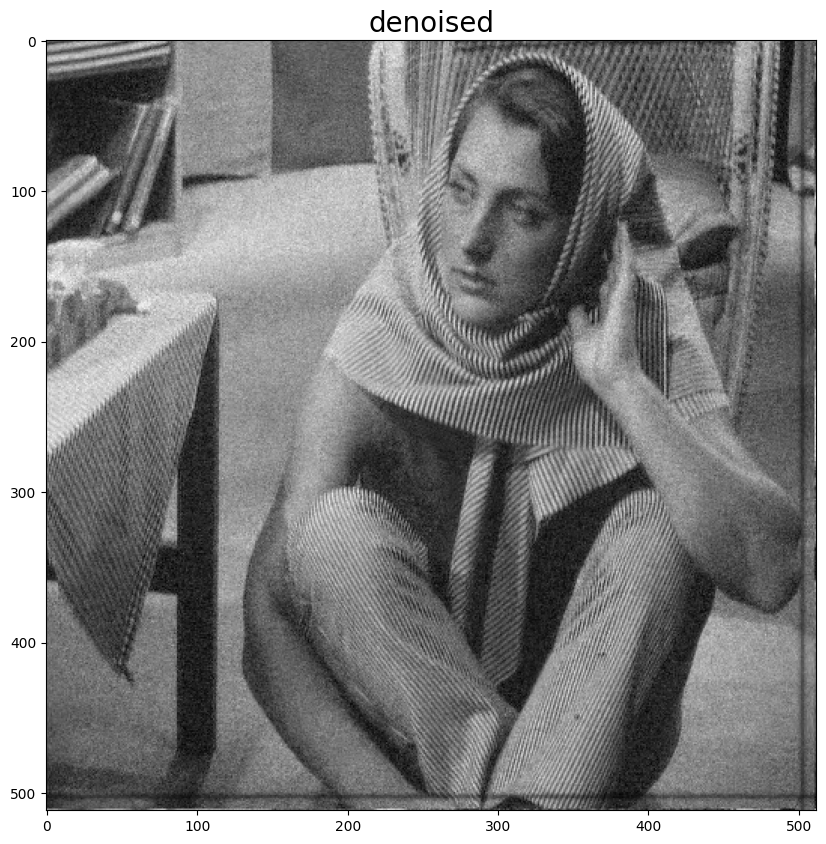

In [13]:
gray_image.show(denoised_img, "denoised")

In [14]:
print(f"time: {time.process_time()} seconds")

time: 100.926752363 seconds


In [15]:
!pip install mrcfile
import mrcfile

In [16]:
input_format = "rec"
tomogram_name = "/home/vruiz/Descargas/TS01-wbp"
tomogram_MRC = mrcfile.open(f'{tomogram_name}.{input_format}')
print(f"tomogram_name={tomogram_name} type={tomogram_MRC.data.dtype} shape={tomogram_MRC.data.shape}")
tomogram = tomogram_MRC.data

tomogram_name=/home/vruiz/Descargas/TS01-wbp type=int8 shape=(200, 464, 480)


In [17]:
denoised_tomogram = _2D_OF_denoising.filter_over_Y(tomogram, kernel, l=2, w=3)

< 74.52558 >
< 74.52558 >
< 74.52558 >
< 74.52558 >
< 74.52558 >
< 74.52558 >
< 74.52558 >
< 74.52558 >
< 34.4306 >
< 43.676975 >
< 40.162388 >
< 37.886303 >
< 40.646194 >
< 48.00235 >
< 63.21966 >
< 57.980923 >
0 < 106.002754 >
< 106.002754 >
< 106.002754 >
< 106.002754 >
< 106.002754 >
< 106.002754 >
< 106.002754 >
< 49.216793 >
< 11.93675 >
< 60.735096 >
< 49.15649 >
< 62.711185 >
< 59.255512 >
< 64.39289 >
< 58.905434 >
< 61.041092 >
1 < 95.99489 >
< 95.99489 >
< 95.99489 >
< 95.99489 >
< 95.99489 >
< 95.99489 >
< 60.057266 >
< 11.046796 >
< 58.04263 >
< 64.12738 >
< 52.908875 >
< 59.35965 >
< 64.10937 >
< 70.74826 >
< 71.13306 >
< 70.48322 >
2 < 64.63034 >
< 64.63034 >
< 64.63034 >
< 64.63034 >
< 64.63034 >
< 63.72536 >
< 39.18087 >
< 14.402607 >
< 17.960241 >
< 21.608372 >
< 20.851124 >
< 63.935196 >
< 65.741104 >
< 68.68113 >
< 68.054955 >
< 66.16611 >
3 < 71.93186 >
< 71.93186 >
< 71.93186 >
< 71.93186 >
< 62.939503 >
< 62.157566 >
< 35.024235 >
< 36.596283 >
< 9.514398 >
< 14.

< 21.521994 >
< 19.826826 >
< 10.661708 >
< 14.141384 >
< 19.195343 >
< 13.747919 >
< 15.262855 >
< 11.738245 >
< 11.409394 >
< 15.41232 >
< 25.171373 >
< 24.990442 >
< 18.03914 >
< 16.95696 >
< 18.276737 >
37 < 21.049017 >
< 20.529596 >
< 17.791883 >
< 16.876858 >
< 17.430891 >
< 23.313612 >
< 14.9676485 >
< 10.480197 >
< 13.031585 >
< 12.578936 >
< 25.251795 >
< 22.501717 >
< 15.265027 >
< 17.50418 >
< 18.291502 >
< 17.697205 >
38 < 22.941181 >
< 12.273107 >
< 13.704661 >
< 13.343893 >
< 11.861702 >
< 11.963263 >
< 12.278607 >
< 16.154306 >
< 10.474526 >
< 26.454025 >
< 25.52205 >
< 18.898453 >
< 19.670254 >
< 24.458426 >
< 22.676521 >
< 23.40727 >
39 < 19.395403 >
< 14.923226 >
< 17.691462 >
< 16.532497 >
< 21.022266 >
< 13.439303 >
< 12.249305 >
< 12.370145 >
< 13.960261 >
< 19.800686 >
< 16.277998 >
< 16.234125 >
< 16.928247 >
< 13.165578 >
< 13.66665 >
< 15.824337 >
40 < 21.511602 >
< 15.340862 >
< 15.832489 >
< 19.174255 >
< 19.317137 >
< 18.464315 >
< 14.670977 >
< 11.948486 >


< 55.115982 >
< 50.683 >
< 51.2772 >
< 57.75636 >
< 48.73862 >
< 44.05139 >
73 < 38.85589 >
< 41.630047 >
< 36.38324 >
< 36.93815 >
< 26.07534 >
< 34.535717 >
< 49.594925 >
< 26.796524 >
< 33.57733 >
< 44.83013 >
< 36.006355 >
< 30.272083 >
< 37.917362 >
< 37.216805 >
< 36.08011 >
< 24.439026 >
74 < 44.430153 >
< 47.58567 >
< 50.207687 >
< 46.73953 >
< 48.20578 >
< 46.92449 >
< 55.608795 >
< 40.245605 >
< 18.624016 >
< 21.653664 >
< 15.18249 >
< 19.942356 >
< 28.525095 >
< 26.06353 >
< 15.757182 >
< 51.49559 >
75 < 57.81441 >
< 61.06534 >
< 61.696266 >
< 61.63202 >
< 62.398804 >
< 67.55356 >
< 55.98802 >
< 45.62401 >


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import *
import cv2

In [ ]:
def g(z=0):
  #cv2_imshow(cv2.normalize(tomogram[z, :, :][0:200,0:200].astype(np.uint8), None, 0, 255, cv2.NORM_MINMAX))
  #cv2_imshow(cv2.normalize(tomogram[z, :, :].astype(np.uint8), None, 0, 255, cv2.NORM_MINMAX))
  plt.imshow(cv2.normalize(tomogram[z, :, :], None, 0, 255, cv2.NORM_MINMAX))
  plt.imshow(cv2.normalize(denoised_tomogram[z, :, :], None, 0, 255, cv2.NORM_MINMAX))

interactive_plot = interactive(g, z=100)
interactive_plot

In [ ]:
fake_tomogram = np.stack([np.roll(noisy_img,0) for i in range(64)])

In [ ]:
def g(z=0):
  plt.imshow(cv2.normalize(fake_tomogram[:, z, :], None, 0, 255, cv2.NORM_MINMAX))

interactive_plot = interactive(g, z=10)
interactive_plot

In [ ]:
fake_denoised_tomogram = _2D_OF_denoising.filter_over_X(fake_tomogram, kernel, l=2, w=3)

In [ ]:
try:
    import optical_flow as motion
    import display
    import prediction
except:
    !pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"
    from motion_estimation import optical_flow as motion
    from motion_estimation import display
    from motion_estimation import prediction

In [ ]:
initial_MVs = np.zeros((fake_tomogram[:, 0, :].shape[0], fake_tomogram[:, 0, :].shape[1], 2), dtype=np.float32)
MVs = motion.Farneback_ME(predicted=fake_tomogram[:, 10, :], reference=fake_tomogram[:, 15, :], initial_MVs=initial_MVs)

In [ ]:
#display.show_vectors(MVs[::1, ::1])
display.show_vectors(MVs)

In [ ]:
np.max(MVs)

In [ ]:
MVs[32,...]

In [ ]:
initial_MVs = np.zeros((tomogram[:, 0, :].shape[0], tomogram[:, 0, :].shape[1], 2), dtype=np.float32)
MVs = motion.Farneback_ME(predicted=tomogram[:, 1, :], reference=tomogram[:, 2, :], initial_MVs=initial_MVs)

In [ ]:
np.max(MVs)

In [ ]:
tomogram.dtype

In [ ]:
fake_tomogram.dtype

In [ ]:
RGB_image.show(display.colorize(MVs))